In [100]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import matplotlib.animation as animation
# from wand.image import Image
# from wand.display import display

In [101]:
odi_info= pd.read_csv(r'/home/payal/Desktop/cricket /odi_info.csv')

In [102]:
odi_scorecard = pd.read_csv(r'/home/payal/Desktop/odi_temp.csv')

In [103]:
odi_info.head()

,city,competition,date,match-id,gender,match-number,match-referee,method,neutralvenue,outcome,...,toss-decision,toss-winner,tv-umpire,umpire-0,umpire-1,venue,winner,winner-runs,winner-wickets,year
0,Belfast,NaN,2006/06/13,225171,male,NaN,CH Lloyd,NaN,NaN,NaN,...,bat,England,NaN,R Dill,DB Hair,Civil Service Cricket Club,England,38.0,NaN,2006
1,London,NaN,2006/09/02,225246,male,2.0,MJ Procter,D/L,NaN,NaN,...,field,Pakistan,NJ Llong,MR Benson,BR Doctrove,Lord's,Pakistan,NaN,7.0,2006
2,Southampton,NaN,2006/09/05,225247,male,3.0,MJ Procter,NaN,NaN,NaN,...,field,Pakistan,PJ Hartley,BR Doctrove,NJ Llong,The Rose Bowl,Pakistan,NaN,2.0,2006
3,Nottingham,NaN,2006/09/08,225248,male,4.0,MJ Procter,NaN,NaN,NaN,...,bat,Pakistan,IJ Gould,MR Benson,DJ Harper,Trent Bridge,England,NaN,8.0,2006
4,Birmingham,NaN,2006/09/10,225249,male,5.0,MJ Procter,NaN,NaN,NaN,...,field,England,NJ Llong,IJ Gould,DJ Harper,Edgbaston,England,NaN,3.0,2006


In [104]:
odi_scorecard.head()

,match_id,team_name,innings,over_ball,name,ball_score,wicket,wicket_by,batsman_out,extras
0,256608,Australia,1,1.1,PA Jaques,0,NaN,0,NaN,0
1,256608,Australia,1,1.2,PA Jaques,0,NaN,0,NaN,0
2,256608,Australia,1,1.3,PA Jaques,0,NaN,0,NaN,0
3,256608,Australia,1,1.4,PA Jaques,0,NaN,0,NaN,0
4,256608,Australia,1,1.5,PA Jaques,2,NaN,0,NaN,0


In [105]:
odi_scorecard.columns

Index(['match_id', 'team_name', 'innings', 'over_ball', 'name', 'ball_score',
       'wicket', 'wicket_by', 'batsman_out', 'extras'],
      dtype='object')

In [106]:
# odi_info['date_1'].value_counts()

In [107]:
# odi_info['date'] = pd.to_datetime(odi_info['date_0'])
# odi_info['season']= odi_info['date'].dt.year
# odi_info.head()

In [108]:
odi_scorecard['ball_of_over'] = odi_scorecard.over_ball.astype(str).str.extract('\.(.*)').astype(int)

In [109]:
odi_scorecard.head(20)

,match_id,team_name,innings,over_ball,name,ball_score,wicket,wicket_by,batsman_out,extras,ball_of_over
0,256608,Australia,1,1.1,PA Jaques,0,NaN,0,NaN,0,1
1,256608,Australia,1,1.2,PA Jaques,0,NaN,0,NaN,0,2
2,256608,Australia,1,1.3,PA Jaques,0,NaN,0,NaN,0,3
3,256608,Australia,1,1.4,PA Jaques,0,NaN,0,NaN,0,4
4,256608,Australia,1,1.5,PA Jaques,2,NaN,0,NaN,0,5
5,256608,Australia,1,1.6,PA Jaques,1,NaN,0,NaN,0,6
6,256608,India,2,2.1,R Dravid,0,NaN,0,NaN,0,1
7,256608,India,2,2.2,R Dravid,0,NaN,0,NaN,0,2
8,256608,India,2,2.3,R Dravid,0,NaN,0,NaN,0,3
9,256608,India,2,2.4,R Dravid,0,NaN,0,NaN,0,4


In [110]:
odi_info.columns

Index(['city', 'competition', 'date', 'match-id', 'gender', 'match-number',
       'match-referee', 'method', 'neutralvenue', 'outcome', 'player-of-match',
       'reserve-umpire', 'season', 'series', 'team-0', 'team-1',
       'toss-decision', 'toss-winner', 'tv-umpire', 'umpire-0', 'umpire-1',
       'venue', 'winner', 'winner-runs', 'winner-wickets', 'year'],
      dtype='object')

In [111]:
# odi_scorecard['wicket_by'].value_counts()

In [112]:
print('Toss Decisions in %\n',((odi_info['toss-decision']).value_counts())/1707*100)

Toss Decisions in %
 bat      53.485647
field    46.514353
Name: toss-decision, dtype: float64


In [113]:
import matplotlib.pyplot as mlt
import seaborn as sns
mlt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [114]:
odi_info.columns

Index(['city', 'competition', 'date', 'match-id', 'gender', 'match-number',
       'match-referee', 'method', 'neutralvenue', 'outcome', 'player-of-match',
       'reserve-umpire', 'season', 'series', 'team-0', 'team-1',
       'toss-decision', 'toss-winner', 'tv-umpire', 'umpire-0', 'umpire-1',
       'venue', 'winner', 'winner-runs', 'winner-wickets', 'year'],
      dtype='object')

In [115]:
# teams=pd.DataFrame(data=None)
# teams=pd.concat([odi_info['team_0'],odi_info['team_1']])
# teams.columns=['team']
# teams.set_index('team',drop=False)
# # teams = team["team"].duplicated(keep = False) 
# teams.head()
# # bool series 
# bool_series 
  
# # passing NOT of bool series to see unique values only 
# data = data[~bool_series] 
# team.columns=['team']


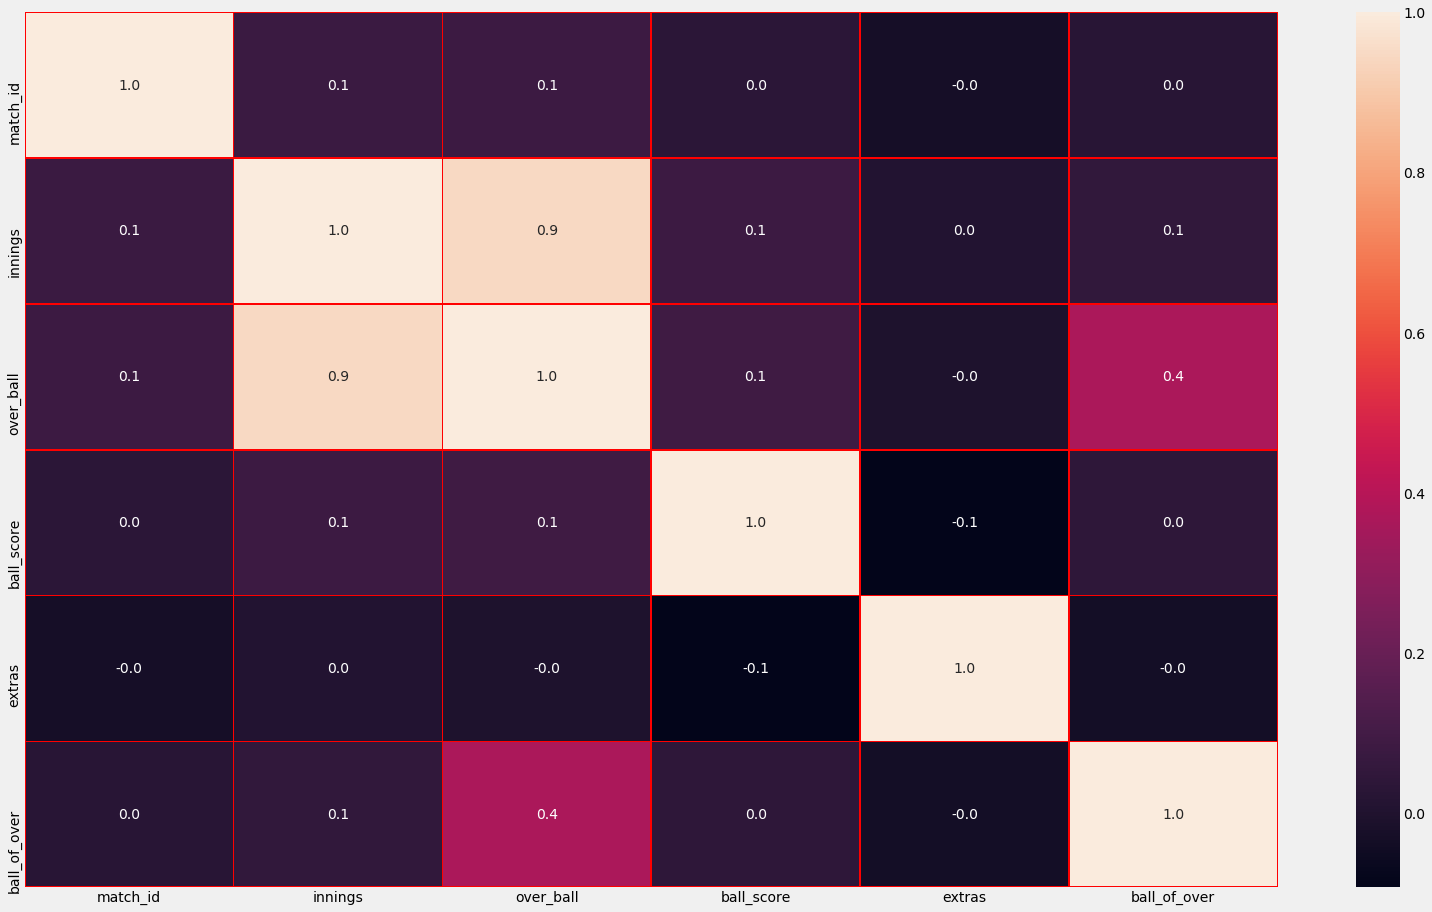

In [116]:
f,ax = plt.subplots(figsize=(25, 15))
sns.heatmap(odi_scorecard.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

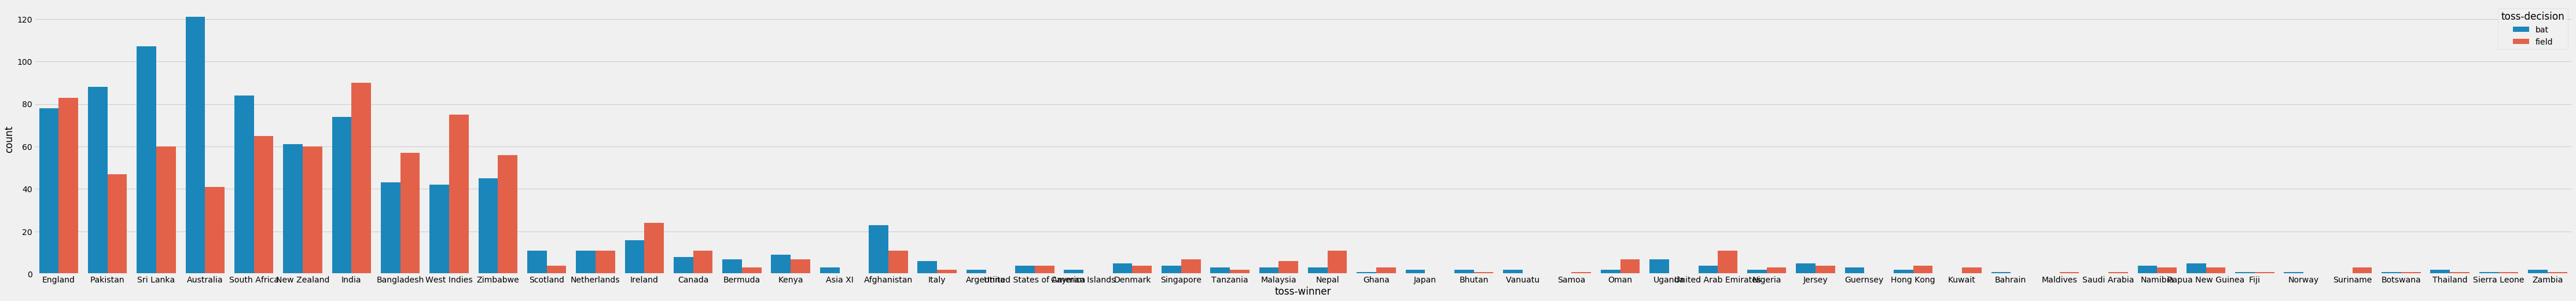

In [117]:
# Toss Decisions across team
mlt.subplots(figsize=(70,8))
sns.countplot(x='toss-winner',hue='toss-decision',data=odi_info)
mlt.show()

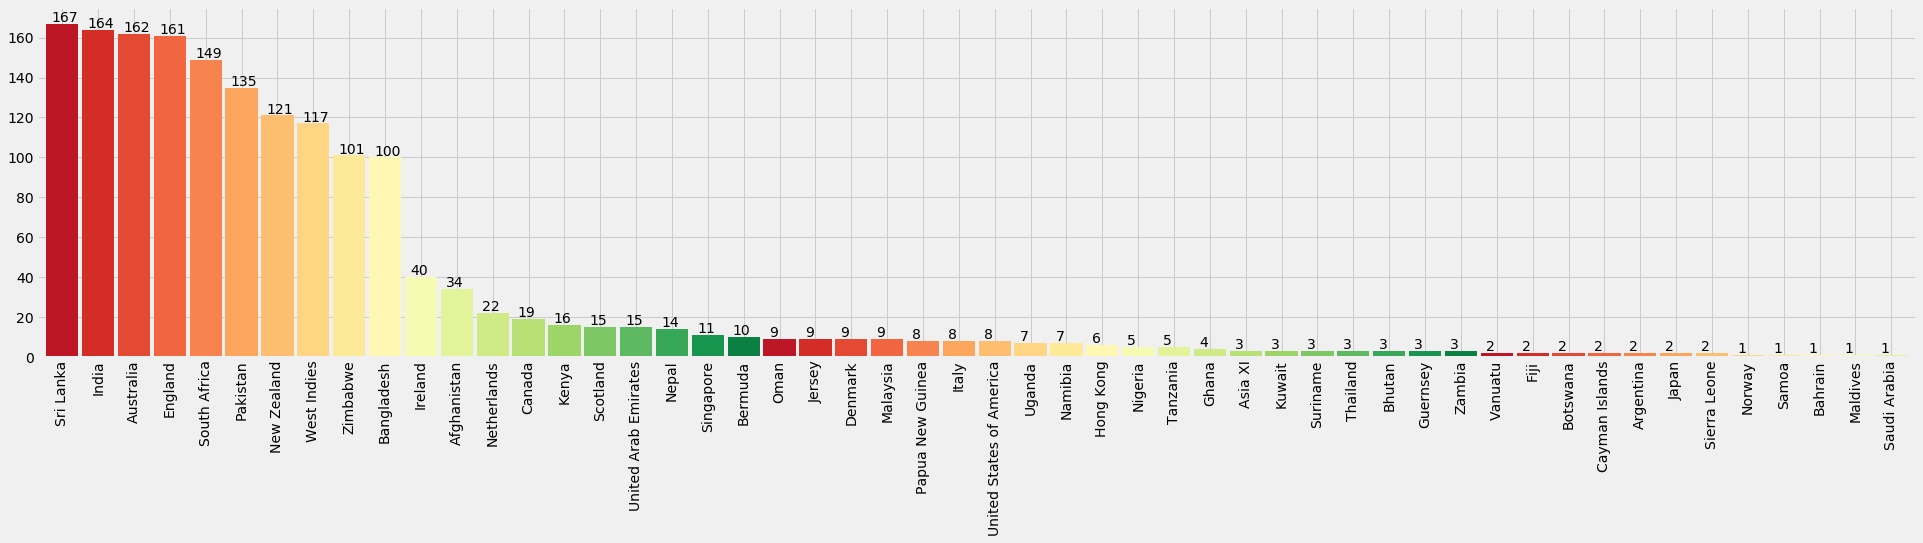

In [118]:
# maximum toss winners
mlt.subplots(figsize=(30,6))
ax=odi_info['toss-winner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('RdYlGn',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
mlt.show()

In [119]:
odi_info.shape

(1707, 26)

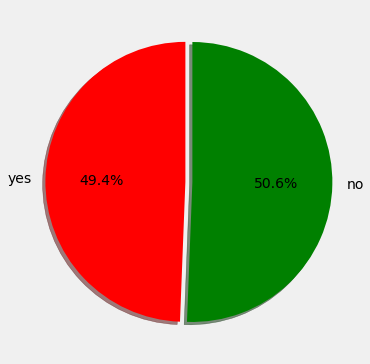

In [120]:
# probability of Toss Winner Also the Match Winner
df=odi_info[odi_info['toss-winner']==odi_info['winner']]
slices=[len(df),(1707-len(df))]
labels=['yes','no']
mlt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%',colors=['r','g'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()

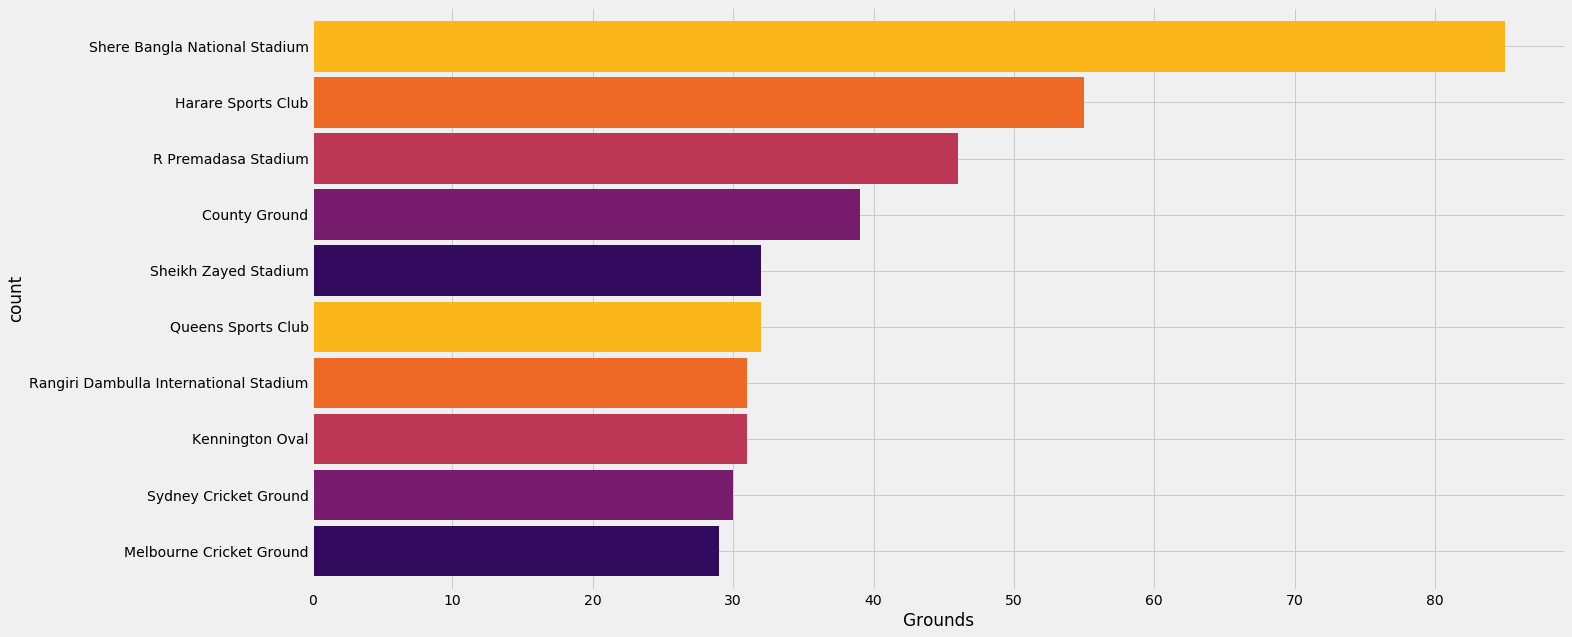

In [121]:
# favourite top 10 grounds
mlt.subplots(figsize=(20,10))
ax = odi_info['venue'].value_counts().head(10).sort_values(ascending=True).plot.barh(width=.9,color=sns.color_palette('inferno',5))
ax.set_xlabel('Grounds')
ax.set_ylabel('count')
mlt.show()

In [122]:
# team_d=odi_info["team"].value_counts().reset_index()
# team_d.columns=['Team1','Total Matches']
# team_d['wins']=odi_info['winner'].value_counts().reset_index()['winner']
# team_d.set_index('Team1',inplace=True)

In [123]:
odi_info.columns

Index(['city', 'competition', 'date', 'match-id', 'gender', 'match-number',
       'match-referee', 'method', 'neutralvenue', 'outcome', 'player-of-match',
       'reserve-umpire', 'season', 'series', 'team-0', 'team-1',
       'toss-decision', 'toss-winner', 'tv-umpire', 'umpire-0', 'umpire-1',
       'venue', 'winner', 'winner-runs', 'winner-wickets', 'year'],
      dtype='object')

In [124]:
# Venue wise Wickets Fallen
import plotly.figure_factory as ff
venues=odi_info['venue'].value_counts()
venue_scores={venue:[] for venue in venues.index[:15]}
for index,row in odi_info.iterrows():
    if venue_scores.get(row['venue'],-1)!=-1:
        venue_scores[row['venue']].append(row['winner-wickets'])
fig=go.Figure()
for index, value in venue_scores.items():
    fig.add_trace(go.Box(y=value,name=index,boxmean='sd'))
fig.update_layout(title='Venue wise Wickets Fallen',xaxis_title='Venue Name',yaxis_title='Wickets Fallen')
fig.show()

In [125]:
odi_scorecard.columns

Index(['match_id', 'team_name', 'innings', 'over_ball', 'name', 'ball_score',
       'wicket', 'wicket_by', 'batsman_out', 'extras', 'ball_of_over'],
      dtype='object')

In [126]:
odi_with_season = odi_info[['match-id','year']].merge(odi_scorecard, left_on = 'match-id', right_on = 'match_id', how = 'left').drop('match-id', axis = 1)

In [127]:
odi_with_season.head(20)

,year,match_id,team_name,innings,over_ball,name,ball_score,wicket,wicket_by,batsman_out,extras,ball_of_over
0,2006,225171,England,1,1.1,ME Trescothick,0,NaN,0,NaN,0,1
1,2006,225171,England,1,1.2,ME Trescothick,0,NaN,0,NaN,0,2
2,2006,225171,England,1,1.3,ME Trescothick,0,NaN,0,NaN,4,3
3,2006,225171,England,1,1.4,ME Trescothick,0,NaN,0,NaN,2,4
4,2006,225171,England,1,1.5,ME Trescothick,0,NaN,0,NaN,0,5
5,2006,225171,England,1,1.6,ME Trescothick,0,NaN,0,NaN,0,6
6,2006,225171,Ireland,2,2.1,DI Joyce,0,NaN,0,NaN,0,1
7,2006,225171,Ireland,2,2.2,DI Joyce,0,NaN,0,NaN,0,2
8,2006,225171,Ireland,2,2.3,DI Joyce,0,NaN,0,NaN,5,3
9,2006,225171,Ireland,2,2.4,DI Joyce,0,NaN,0,NaN,5,4


In [128]:
matches_played=pd.concat([odi_info['team-0'],odi_info['team-1']])
matches_played=matches_played.value_counts().reset_index()
matches_played.columns=['Team','Total Matches']
matches_played['wins']=odi_info['winner'].value_counts().reset_index()['winner']

matches_played.set_index('Team',inplace=True)


In [129]:
matches_played.reset_index().head(8)

,Team,Total Matches,wins
0,India,330,222.0
1,Australia,330,204.0
2,Sri Lanka,328,174.0
3,England,305,164.0
4,South Africa,283,162.0
5,Pakistan,281,136.0
6,New Zealand,253,133.0
7,West Indies,246,88.0


In [130]:
win_percentage = round(matches_played['wins']/matches_played['Total Matches'],3)*100
win_percentage.head(3)

Team
India        67.3
Australia    61.8
Sri Lanka    53.0
dtype: float64

In [131]:
import plotly as py
from plotly import tools
from plotly.offline import init_notebook_mode,iplot
trace1 = go.Bar(x=matches_played.index,y=matches_played['Total Matches'],
                name='Total Matches',opacity=0.4)

trace2 = go.Bar(x=matches_played.index,y=matches_played['wins'],
                name='Matches Won',marker=dict(color='red'),opacity=0.4)

trace3 = go.Bar(x=matches_played.index,
               y=(round(matches_played['wins']/matches_played['Total Matches'],3)*100),
               name='Win Percentage',opacity=0.6,marker=dict(color='gold'))

data = [trace1, trace2, trace3]

layout = go.Layout(title='Match Played, Wins And Win Percentage',xaxis=dict(title='Team'),
                   yaxis=dict(title='Count'),bargap=0.2,bargroupgap=0.1)

fig = go.Figure(data=data, layout=layout)
iplot(fig)



In [69]:
# matches_played_byteams.head()

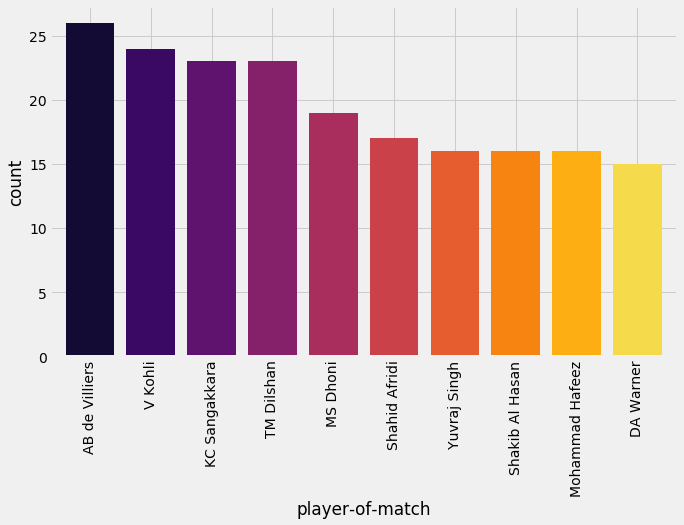

In [70]:
# maximum man of match

mlt.subplots(figsize=(10,6))
a = odi_info['player-of-match'].value_counts().head(10).plot.bar(width=.8, color=sns.color_palette('inferno',10))  #counts the values corresponding 
# to each batsman and then filters out the top 10 batsman and then plots a bargraph 
a.set_xlabel('player-of-match') 
a.set_ylabel('count')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
mlt.show()

In [71]:
odi_with_season.columns
odi_info.columns


Index(['city', 'competition', 'date', 'match-id', 'gender', 'match-number',
       'match-referee', 'method', 'neutralvenue', 'outcome', 'player-of-match',
       'reserve-umpire', 'season', 'series', 'team-0', 'team-1',
       'toss-decision', 'toss-winner', 'tv-umpire', 'umpire-0', 'umpire-1',
       'venue', 'winner', 'winner-runs', 'winner-wickets', 'year'],
      dtype='object')

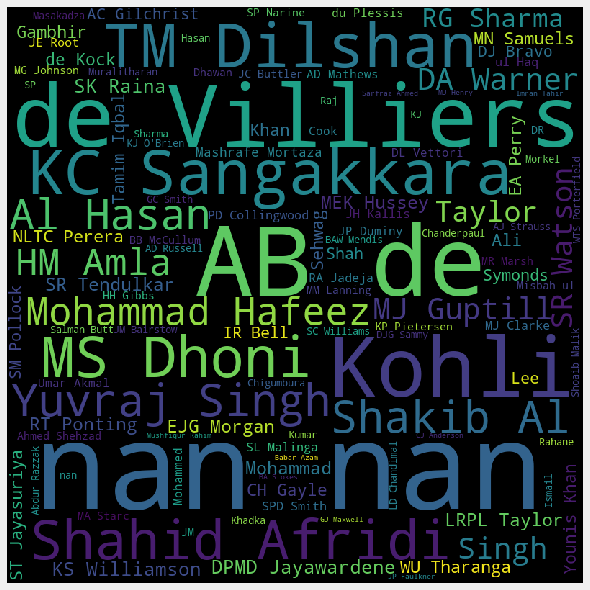

In [138]:
import seaborn as sns

names = ' '
for name in odi_info['player-of-match']:
    name = str(name)
    names = names + name + ' '
from wordcloud import WordCloud, STOPWORDS 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black',  
                min_font_size = 10).generate(names) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [139]:
odi_scorecard.columns

Index(['match_id', 'team_name', 'innings', 'over_ball', 'name', 'ball_score',
       'wicket', 'wicket_by', 'batsman_out', 'extras', 'ball_of_over'],
      dtype='object')

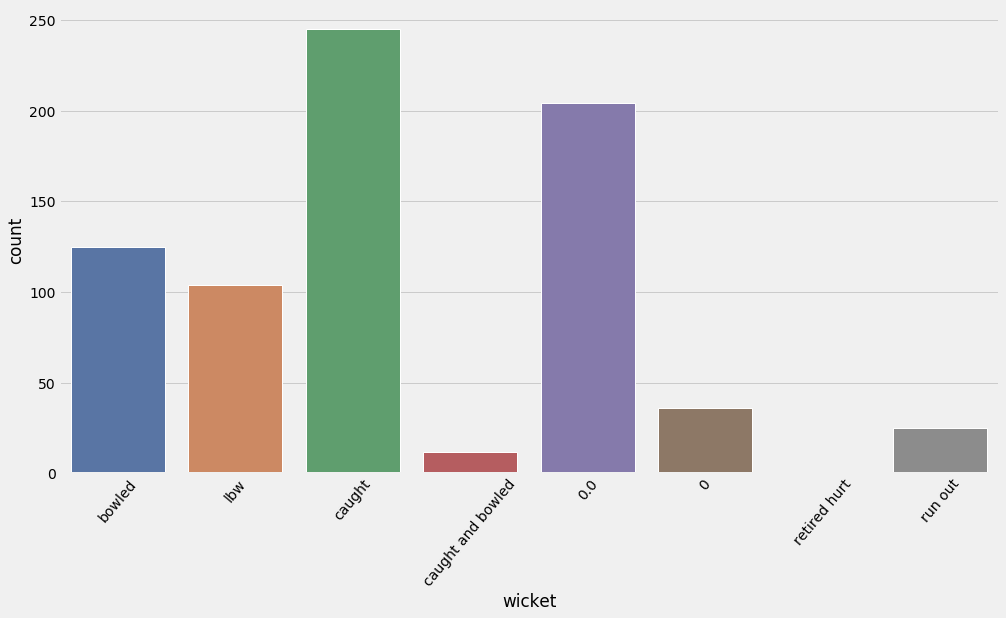

In [140]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=50)
sns.set()
sns.set(style="darkgrid")
ax = sns.countplot(x=odi_scorecard['wicket'], data=odi_scorecard)

/home/payal/anaconda3/envs/home/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



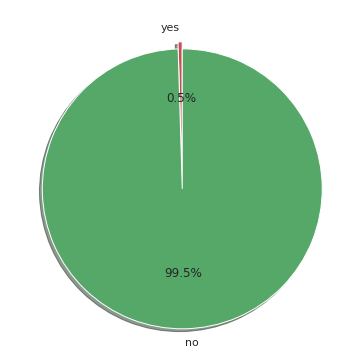

In [52]:
# probability of wicket by bowled
df=odi_info[odi_scorecard['wicket']=='bowled']
slices=[len(df),(1707-len(df))]
labels=['yes','no']
mlt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%',colors=['r','g'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()

/home/payal/anaconda3/envs/home/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



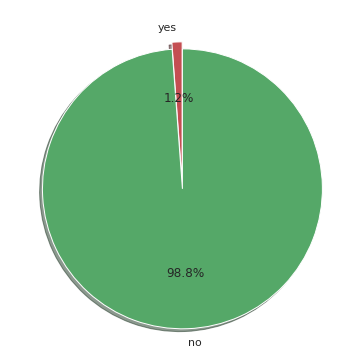

In [53]:
# probability of wicket by caught
df=odi_info[odi_scorecard['wicket']=='caught']
slices=[len(df),(1707-len(df))]
labels=['yes','no']
mlt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%',colors=['r','g'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()

/home/payal/anaconda3/envs/home/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



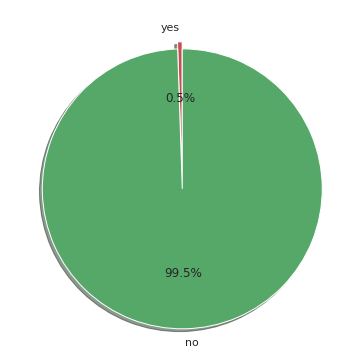

In [54]:
# probability of wicket by lbw
df=odi_info[odi_scorecard['wicket']=='lbw']
slices=[len(df),(1707-len(df))]
labels=['yes','no']
mlt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%',colors=['r','g'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()

/home/payal/anaconda3/envs/home/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



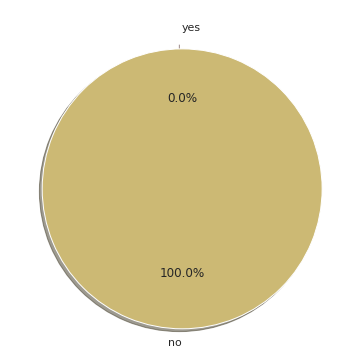

In [55]:
# probability of wicket by run out
df=odi_info[odi_scorecard['wicket']=='run out']
slices=[len(df),(1707-len(df))]
labels=['yes','no']
mlt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%',colors=['r','y'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()

/home/payal/anaconda3/envs/home/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



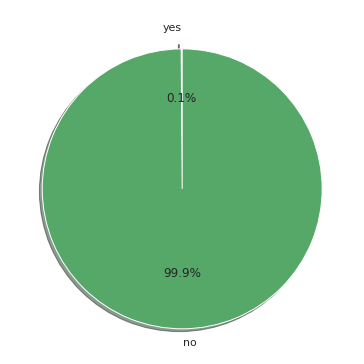

In [56]:
# probability of wicket by caught and bowled
df=odi_info[odi_scorecard['wicket']=='caught and bowled']
slices=[len(df),(1707-len(df))]
labels=['yes','no']
mlt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%',colors=['r','g'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()

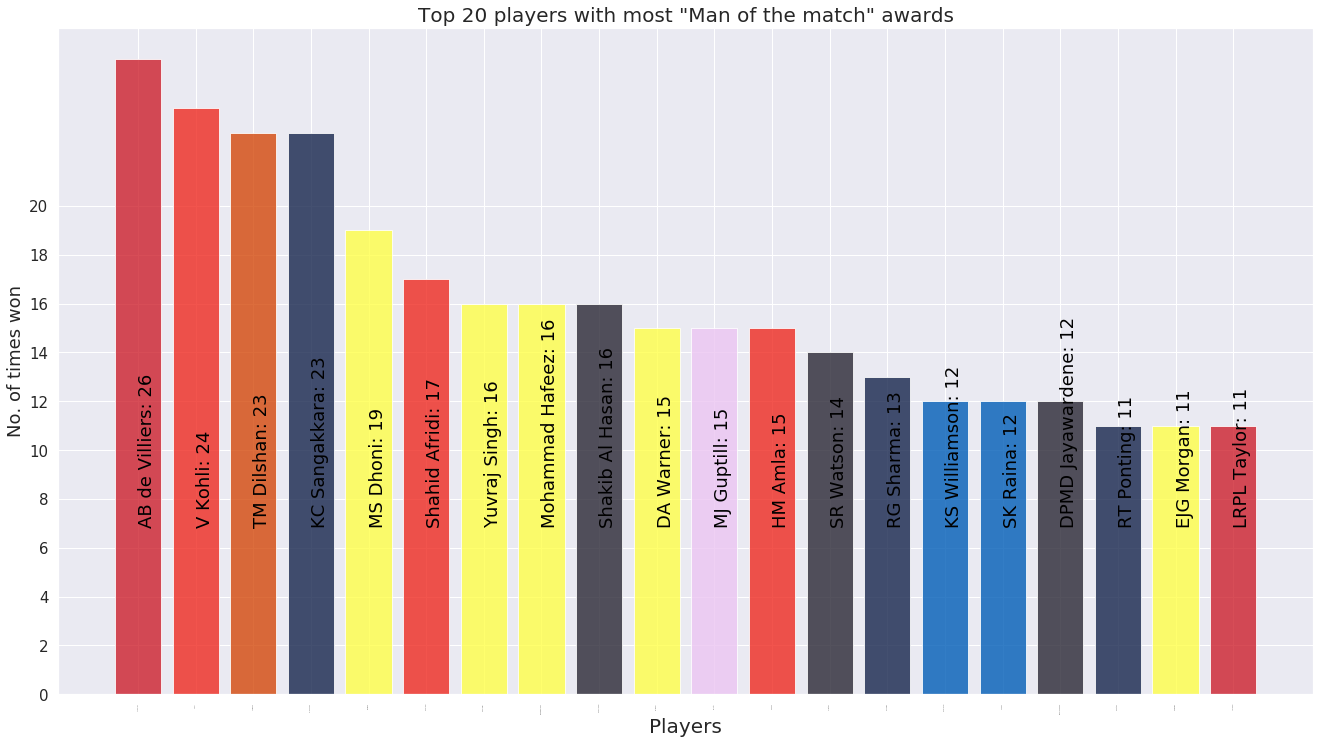

In [57]:
# Top 20 players with most MOM awards

players=pd.DataFrame(odi_info['player-of-match'].value_counts())
players['name']=players.index
players=players.head(20)
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.xticks(rotation=90,fontsize=0)
plt.yticks([0,2,4,6,8,10,12,14,16,18,20],[0,2,4,6,8,10,12,14,16,18,20],fontsize=15)
plt.bar(players['name'], players['player-of-match'],
        color=['#CD202D','#EF2920','#D4480B','#15244C','#FFFF48','#EF2920',
               '#FFFF48','#FFFF48','#292734','#FFFF48','#ECC5F2','#EF2920',
               '#292734','#15244C','#005DB7','#005DB7','#292734','#15244C',
               '#FFFF48','#CD202D'],alpha=0.8)
count=0
for i in players['player-of-match']:
    plt.text(count,7,players['name'][count]+': '+str(i),rotation=90,color='black',size=18)
    count+=1
plt.title('Top 20 players with most "Man of the match" awards',fontsize=20)
plt.xlabel('Players',fontsize=20)
plt.ylabel('No. of times won',fontsize=18)
plt.tight_layout()
plt.show()

In [58]:
odi_scorecard.columns

Index(['match_id', 'team_name', 'innings', 'over_ball', 'name', 'ball_score',
       'wicket', 'wicket_by', 'batsman_out', 'extras', 'ball_of_over'],
      dtype='object')

In [59]:
odi_info.columns


Index(['city', 'competition', 'date', 'match-id', 'gender', 'match-number',
       'match-referee', 'method', 'neutralvenue', 'outcome', 'player-of-match',
       'reserve-umpire', 'season', 'series', 'team-0', 'team-1',
       'toss-decision', 'toss-winner', 'tv-umpire', 'umpire-0', 'umpire-1',
       'venue', 'winner', 'winner-runs', 'winner-wickets', 'year'],
      dtype='object')